<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectifs-:" data-toc-modified-id="Objectifs-:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectifs :</a></span></li><li><span><a href="#Via-https://github.com/weatherbit/weatherbit-python" data-toc-modified-id="Via-https://github.com/weatherbit/weatherbit-python-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Via <a href="https://github.com/weatherbit/weatherbit-python" target="_blank">https://github.com/weatherbit/weatherbit-python</a></a></span><ul class="toc-item"><li><span><a href="#Téléchargement-et-lecture-de-la-météo" data-toc-modified-id="Téléchargement-et-lecture-de-la-météo-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Téléchargement et lecture de la météo</a></span><ul class="toc-item"><li><span><a href="#dev-création-du-fichier" data-toc-modified-id="dev-création-du-fichier-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>dev création du fichier</a></span></li><li><span><a href="#Industrialisation" data-toc-modified-id="Industrialisation-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Industrialisation</a></span></li><li><span><a href="#Lecture-du-fichier" data-toc-modified-id="Lecture-du-fichier-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Lecture du fichier</a></span></li><li><span><a href="#Analyse-des-features" data-toc-modified-id="Analyse-des-features-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Analyse des features</a></span></li><li><span><a href="#Faire-un-call-solo-historique" data-toc-modified-id="Faire-un-call-solo-historique-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Faire un call solo historique</a></span></li></ul></li></ul></li><li><span><a href="#OLD" data-toc-modified-id="OLD-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>OLD</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Via-api.meteo-concept.com" data-toc-modified-id="Via-api.meteo-concept.com-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Via api.meteo-concept.com</a></span><ul class="toc-item"><li><span><a href="#Commentaires" data-toc-modified-id="Commentaires-3.0.1.1"><span class="toc-item-num">3.0.1.1&nbsp;&nbsp;</span>Commentaires</a></span></li></ul></li><li><span><a href="#Via-www.historique-meteo.net/france/aquitaine/bordeaux/" data-toc-modified-id="Via-www.historique-meteo.net/france/aquitaine/bordeaux/-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Via <a href="http://www.historique-meteo.net/france/aquitaine/bordeaux/" target="_blank">www.historique-meteo.net/france/aquitaine/bordeaux/</a></a></span><ul class="toc-item"><li><span><a href="#Commentaires-:" data-toc-modified-id="Commentaires-:-3.0.2.1"><span class="toc-item-num">3.0.2.1&nbsp;&nbsp;</span>Commentaires :</a></span></li></ul></li></ul></li></ul></li></ul></div>

In [1]:
from dotenv import load_dotenv
load_dotenv()

import pandas as pd
import requests
import datetime
from weatherbit.api import Api

from vcub_keeper.reader.reader import *
from vcub_keeper.config import *

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

%load_ext autoreload
%autoreload 2

# Objectifs :

- Test des différentes API et site météo afin de créer un historique et pouvoir aussi query la météo au jour J (. 
- Création d'un fichier météo
- Export (dans `ROOT_DATA_REF/meteo.csv`)
- Lecture
                                                                                                                
github : https://github.com/armgilles/vcub_keeper/issues/24

# Via https://github.com/weatherbit/weatherbit-python

## Téléchargement et lecture de la météo

### dev création du fichier

In [2]:
api = Api(API_METEO)
#api.set_granularity('daily')
api.set_granularity('hourly')

# To forecast
#forecast = api.get_forecast(city="Bordeaux", country="FR")

In [3]:
# Init DataFrame
meteo_full = pd.DataFrame()

min_date_history = '2018-12-01'
max_date_history = '2020-09-18'
date_list = pd.date_range(start=min_date_history, end=max_date_history)
for date in date_list:
    # Date processing
    date_minus_one_day = date - datetime.timedelta(days=1)
    date_str = date.strftime(format='%Y-%m-%d')
    date_minus_one_day_str = date_minus_one_day.strftime(format='%Y-%m-%d')
    print(date_minus_one_day_str + " " + date_str)
    
    # Call API
    try:
        history = api.get_history(city="Bordeaux", country="FR",
                                  start_date=date_minus_one_day_str,
                                  end_date=date_str)
        meteo_day = pd.DataFrame(history.get_series(['temp', 'precip',
                                                     'rh', 'pres',
                                                     'wind_spd']))
        meteo_full = pd.concat([meteo_full, meteo_day])
    except requests.HTTPError as exception:
        print(exception)

2018-11-30 2018-12-01
2018-12-01 2018-12-02
2018-12-02 2018-12-03
2018-12-03 2018-12-04
2018-12-04 2018-12-05
2018-12-05 2018-12-06
2018-12-06 2018-12-07
2018-12-07 2018-12-08
2018-12-08 2018-12-09
2018-12-09 2018-12-10
2018-12-10 2018-12-11
2018-12-11 2018-12-12
2018-12-12 2018-12-13
2018-12-13 2018-12-14
2018-12-14 2018-12-15
2018-12-15 2018-12-16
2018-12-16 2018-12-17
2018-12-17 2018-12-18
2018-12-18 2018-12-19
2018-12-19 2018-12-20
2018-12-20 2018-12-21
2018-12-21 2018-12-22
2018-12-22 2018-12-23
2018-12-23 2018-12-24
2018-12-24 2018-12-25
2018-12-25 2018-12-26
2018-12-26 2018-12-27
2018-12-27 2018-12-28
2018-12-28 2018-12-29
2018-12-29 2018-12-30
2018-12-30 2018-12-31
2018-12-31 2019-01-01
2019-01-01 2019-01-02
2019-01-02 2019-01-03
2019-01-03 2019-01-04
2019-01-04 2019-01-05
2019-01-05 2019-01-06
2019-01-06 2019-01-07
2019-01-07 2019-01-08
2019-01-08 2019-01-09
2019-01-09 2019-01-10
2019-01-10 2019-01-11
2019-01-11 2019-01-12
2019-01-12 2019-01-13
2019-01-13 2019-01-14
2019-01-14

2019-12-08 2019-12-09
2019-12-09 2019-12-10
2019-12-10 2019-12-11
2019-12-11 2019-12-12
2019-12-12 2019-12-13
2019-12-13 2019-12-14
2019-12-14 2019-12-15
2019-12-15 2019-12-16
2019-12-16 2019-12-17
2019-12-17 2019-12-18
2019-12-18 2019-12-19
2019-12-19 2019-12-20
2019-12-20 2019-12-21
2019-12-21 2019-12-22
2019-12-22 2019-12-23
2019-12-23 2019-12-24
2019-12-24 2019-12-25
2019-12-25 2019-12-26
2019-12-26 2019-12-27
2019-12-27 2019-12-28
2019-12-28 2019-12-29
2019-12-29 2019-12-30
2019-12-30 2019-12-31
2019-12-31 2020-01-01
2020-01-01 2020-01-02
2020-01-02 2020-01-03
2020-01-03 2020-01-04
2020-01-04 2020-01-05
2020-01-05 2020-01-06
2020-01-06 2020-01-07
2020-01-07 2020-01-08
2020-01-08 2020-01-09
2020-01-09 2020-01-10
2020-01-10 2020-01-11
2020-01-11 2020-01-12
2020-01-12 2020-01-13
2020-01-13 2020-01-14
2020-01-14 2020-01-15
2020-01-15 2020-01-16
2020-01-16 2020-01-17
2020-01-17 2020-01-18
2020-01-18 2020-01-19
2020-01-19 2020-01-20
2020-01-20 2020-01-21
2020-01-21 2020-01-22
2020-01-22

In [4]:
meteo_full.head()

,temp,precip,rh,pres,wind_spd,datetime
0,10.5,0.000000,93,1010.5,6.4,2018-11-30 00:00:00
1,10.3,0.000000,100,1010.1,6.8,2018-11-30 01:00:00
2,10.3,0.000000,100,1010.5,6.8,2018-11-30 02:00:00
3,NaN,0.575195,100,1016.4,6.4,2018-11-30 03:00:00
4,0.0,0.000000,100,1009.7,6.0,2018-11-30 04:00:00


In [5]:
# Accumulated precipitation (default mm)
meteo_full.rename(columns = {'precip':'precipitation'}, inplace = True)
# Average temperature
meteo_full.rename(columns = {'temp':'temperature'}, inplace = True)
# Average relative humidity (%)
meteo_full.rename(columns = {'rh':'humidity'}, inplace = True)
# Average pressure (mb)
meteo_full.rename(columns = {'pres':'pressure'}, inplace = True)
# Wind_speed (m/s)
meteo_full.rename(columns = {'wind_spd':'wind_speed'}, inplace = True)

# date
meteo_full.rename(columns = {'datetime':'date'}, inplace = True)

meteo_full = meteo_full[['date', 'temperature',
                         'pressure', 'humidity',
                         'precipitation', 'wind_speed']]

In [6]:
meteo_full.tail()

,date,temperature,pressure,humidity,precipitation,wind_speed
19,2020-09-17 19:00:00,26.4,1006.2,39,0.0,1.5
20,2020-09-17 20:00:00,24.2,1006.3,49,0.0,0.5
21,2020-09-17 21:00:00,23.9,1006.5,46,0.0,2.6
22,2020-09-17 22:00:00,24.4,1006.3,45,0.0,3.1
23,2020-09-17 23:00:00,24.4,1005.9,47,0.0,2.6


In [8]:
meteo_full.shape

(15792, 6)

In [10]:
# Check
min_date = meteo_full.date.min()
max_date = meteo_full.date.max()
date_ref = pd.date_range(start=min_date, end=max_date, freq='h')

# Si le référenciel n'a pas toutes les dates dans Timestamp
assert date_ref.isin(meteo_full['date']).all() == True # Doit etre à True
    
# Si il n'y a pas de différence symetrique entre les 2 séries de dates
assert len(date_ref.symmetric_difference(meteo_full['date'])) == 0 # Doit etre à 0

# Si il y a des doublons
assert meteo_full['date'].is_unique == True # Doit etre à True

assert meteo_full['date'].is_monotonic_increasing == True # Doit etre à True

In [20]:
# export
meteo_full.to_csv(ROOT_DATA_REF+'meteo.csv',
                 index=False)

### Industrialisation

In [ ]:
def create_meteo(min_date_history="2018-12-01", max_date_history='2020-09-18'):
    """
    Multiple call API afin de créer un fichier et d'exporte celui-ci
    dans ROOT_DATA_REF/meteo.csv
    
    Parameters
    ----------
    min_date_history : str
        date du début de l'historique (format 'yyyy-mm-dd')
    max_date_history : str
        date de fin de l'historique (format 'yyyy-mm-dd')
    
    Returns
    -------
    None
        
    Examples
    --------
    
    create_meteo(min_date_history="2018-12-01", max_date_history='2021-03-18')
    """
    api = Api(API_METEO)
    api.set_granularity('hourly')
    
    # Init DataFrame
    meteo_full = pd.DataFrame()

    # Calls API
    date_list = pd.date_range(start=min_date_history, end=max_date_history)
    for date in date_list:
        # Date processing
        date_minus_one_day = date - datetime.timedelta(days=1)
        date_str = date.strftime(format='%Y-%m-%d')
        date_minus_one_day_str = date_minus_one_day.strftime(format='%Y-%m-%d')
        print(date_minus_one_day_str + " " + date_str)

        # Call API
        try:
            history = api.get_history(city="Bordeaux", country="FR",
                                      start_date=date_minus_one_day_str,
                                      end_date=date_str)
            meteo_day = pd.DataFrame(history.get_series(['temp', 'precip',
                                                         'rh', 'pres',
                                                         'wind_spd']))
            meteo_full = pd.concat([meteo_full, meteo_day])
        except requests.HTTPError as exception:
            print(exception)

    # Naming DataFrame
    
    # Accumulated precipitation (default mm)
    meteo_full.rename(columns = {'precip':'precipitation'}, inplace = True)
    # Average temperature
    meteo_full.rename(columns = {'temp':'temperature'}, inplace = True)
    # Average relative humidity (%)
    meteo_full.rename(columns = {'rh':'humidity'}, inplace = True)
    # Average pressure (mb)
    meteo_full.rename(columns = {'pres':'pressure'}, inplace = True)
    # Wind_speed (m/s)
    meteo_full.rename(columns = {'wind_spd':'wind_speed'}, inplace = True)
    # date
    meteo_full.rename(columns = {'datetime':'date'}, inplace = True)

    meteo_full = meteo_full[['date', 'temperature',
                             'pressure', 'humidity',
                             'precipitation', 'wind_speed']]
    
    # Check
    min_date = meteo_full.date.min()
    max_date = meteo_full.date.max()
    date_ref = pd.date_range(start=min_date, end=max_date, freq='h')

    # Si le référenciel n'a pas toutes les dates dans Timestamp
    assert date_ref.isin(meteo_full['date']).all() == True

    # Si il n'y a pas de différence symetrique entre les 2 séries de dates
    assert len(date_ref.symmetric_difference(meteo_full['date'])) == 0 

    # Si il y a des doublons
    assert meteo_full['date'].is_unique == True

    # Si les date augmentent
    assert meteo_full['date'].is_monotonic_increasing == True
    
    # export
    max_date_full = meteo_full.date.max().strftime('%Y-%m-%d')
    meteo_full.to_csv(ROOT_DATA_REF+'meteo/meteo_'+max_date_full+'.csv',
                     index=False)

### Lecture du fichier

In [12]:
def read_meteo(path_directory, file_name='meteo.csv'):
    """
    Lecture du fichier météo dans le répertoire dans ROOT_DATA_REF
    Parameters
    ----------
    path_directory : str
        chemin d'accès (ROOT_DATA_REF)
    file_name : str
        Nom du fichier

    Returns
    -------
    meteo : DataFrame
        
    Examples
    --------
    
    meteo = read_meteo(path_directory=ROOT_DATA_REF)
    """
    
    meteo = pd.read_csv(path_directory+file_name, parse_dates=['date'])
    
    return meteo

In [3]:
from vcub_keeper.reader.reader import read_meteo
from vcub_keeper.config import ROOT_DATA_REF
meteo = read_meteo(path_directory=ROOT_DATA_REF)

In [4]:
print(meteo.tail().to_markdown())

|       | date                |   temperature |   pressure |   humidity |   precipitation |   wind_speed |
|------:|:--------------------|--------------:|-----------:|-----------:|----------------:|-------------:|
| 15787 | 2020-09-17 19:00:00 |          26.4 |     1006.2 |         39 |               0 |          1.5 |
| 15788 | 2020-09-17 20:00:00 |          24.2 |     1006.3 |         49 |               0 |          0.5 |
| 15789 | 2020-09-17 21:00:00 |          23.9 |     1006.5 |         46 |               0 |          2.6 |
| 15790 | 2020-09-17 22:00:00 |          24.4 |     1006.3 |         45 |               0 |          3.1 |
| 15791 | 2020-09-17 23:00:00 |          24.4 |     1005.9 |         47 |               0 |          2.6 |


### Analyse des features

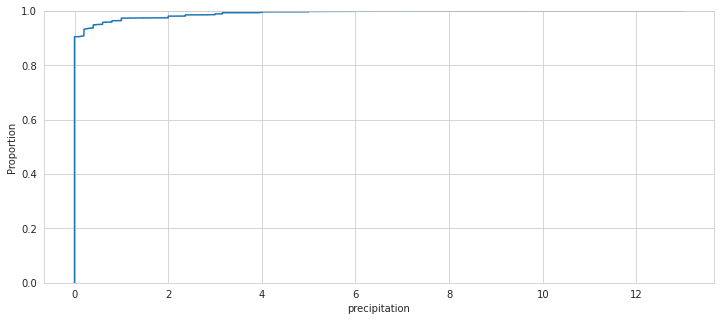

In [9]:
plt.figure(figsize=(12,5))
sns.ecdfplot(data=meteo, x='precipitation');

### Faire un call solo historique

In [16]:
# Historique
api = Api(API_METEO)
api.set_granularity('hourly')

try:
    history = api.get_history(city="Bordeaux", country="FR", 
                              start_date='2020-09-25',end_date='2020-09-26')
except requests.HTTPError as exception:
    print(exception)

[Documentation hourly features](https://www.weatherbit.io/api/weather-history-hourly)

In [17]:
history.json

{'timezone': 'Europe/Paris',
 'state_code': '75',
 'country_code': 'FR',
 'lat': 44.84044,
 'lon': -0.5805,
 'city_name': 'Bordeaux',
 'station_id': '075100-99999',
 'data': [{'rh': 85,
   'wind_spd': 4.1,
   'timestamp_utc': '2020-09-25T00:00:00',
   'vis': 5,
   'slp': 1010.4,
   'pod': 'n',
   'dni': 0,
   'elev_angle': -46.09,
   'pres': 1004.4,
   'h_angle': -90,
   'dewpt': 9,
   'snow': 0,
   'uv': 0,
   'solar_rad': 0,
   'wind_dir': 260,
   'weather': {'icon': 'c04n', 'code': 804, 'description': 'Overcast clouds'},
   'ghi': 0,
   'dhi': 0,
   'timestamp_local': '2020-09-25T02:00:00',
   'app_temp': 11.4,
   'azimuth': 1.97,
   'datetime': '2020-09-25:00',
   'temp': 11.4,
   'precip': 0,
   'clouds': 78,
   'ts': 1600992000},
  {'rh': 80,
   'wind_spd': 3.6,
   'timestamp_utc': '2020-09-25T01:00:00',
   'vis': 5,
   'slp': 1010.8,
   'pod': 'n',
   'dni': 0,
   'elev_angle': -43.8,
   'pres': 1004.8,
   'h_angle': -90,
   'dewpt': 8,
   'snow': 0,
   'uv': 0,
   'solar_rad': 

In [28]:
history.get_series(['temp', 'precip','rh', 'pres', 'wind_spd'])

[{'temp': 19.5,
  'precip': 0,
  'rh': 78,
  'pres': 1011.9,
  'wind_spd': 1.5,
  'datetime': datetime.datetime(2020, 9, 17, 0, 0)},
 {'temp': 20.1,
  'precip': 0,
  'rh': 77,
  'pres': 1011.4,
  'wind_spd': 2.6,
  'datetime': datetime.datetime(2020, 9, 17, 1, 0)},
 {'temp': 19.6,
  'precip': 0,
  'rh': 79,
  'pres': 1011,
  'wind_spd': 3.1,
  'datetime': datetime.datetime(2020, 9, 17, 2, 0)},
 {'temp': 18.5,
  'precip': 0,
  'rh': 82,
  'pres': 1010.8,
  'wind_spd': 1.5,
  'datetime': datetime.datetime(2020, 9, 17, 3, 0)},
 {'temp': 18.6,
  'precip': 0,
  'rh': 79,
  'pres': 1010.9,
  'wind_spd': 2.6,
  'datetime': datetime.datetime(2020, 9, 17, 4, 0)},
 {'temp': 18.1,
  'precip': 0,
  'rh': 78,
  'pres': 1010.6,
  'wind_spd': 2.1,
  'datetime': datetime.datetime(2020, 9, 17, 5, 0)},
 {'temp': 18.3,
  'precip': 0,
  'rh': 77,
  'pres': 1010.5,
  'wind_spd': 2.6,
  'datetime': datetime.datetime(2020, 9, 17, 6, 0)},
 {'temp': 19.7,
  'precip': 0,
  'rh': 71,
  'pres': 1010.6,
  'wind_sp

In [22]:
pd.DataFrame(history.get_series(['max_temp', 'min_temp', 'precip','temp','rh', 'pres', 'wind_spd']))

,max_temp,min_temp,precip,temp,rh,pres,wind_spd,datetime
0,None,None,0.0,11.4,85,1004.4,4.1,2020-09-25 00:00:00
1,None,None,0.0,11.3,80,1004.8,3.6,2020-09-25 01:00:00
2,None,None,0.0,11.3,84,1004.5,3.6,2020-09-25 02:00:00
3,None,None,0.0,11.4,84,1003.6,4.1,2020-09-25 03:00:00
4,None,None,1.2,11.5,85,1004.5,5.7,2020-09-25 04:00:00
5,None,None,0.8,10.7,88,1004.3,6.2,2020-09-25 05:00:00
6,None,None,0.4,10.3,92,1004.8,4.1,2020-09-25 06:00:00
7,None,None,0.4,10.4,92,1005.3,2.6,2020-09-25 07:00:00
8,None,None,0.0,11.6,89,1006.5,4.6,2020-09-25 08:00:00
9,None,None,1.7,10.2,92,1007.5,4.1,2020-09-25 09:00:00


# OLD

### Via api.meteo-concept.com

[Descriptif variables](https://api.meteo-concept.com/documentation#forecast-map-day)

#### Commentaires

Impossible en gratuit d'obtenir l'historique de la météo pour Bordeaux.

In [74]:
token = "f4f60f6d565884dc7c946cccf2f49e2c7a994e1777462cea5a8168c8d8612e2d"
url = "https://api.meteo-concept.com/api/forecast/daily/0?token="+token+"&insee=33063"

In [75]:
response = requests.get(url=url)

In [76]:
response.status_code

200

In [77]:
all_meteo_bdx = response.json()

In [78]:
all_meteo_bdx

{'city': {'insee': '33063',
  'cp': 33000,
  'name': 'Bordeaux',
  'latitude': 44.8572,
  'longitude': -0.5737,
  'altitude': 9},
 'update': '2020-09-16T12:21:20+0200',
 'forecast': {'insee': '33063',
  'cp': 33000,
  'latitude': 44.8572,
  'longitude': -0.5737,
  'day': 0,
  'datetime': '2020-09-16T02:00:00+0200',
  'wind10m': 5,
  'gust10m': 25,
  'dirwind10m': 34,
  'rr10': 0.0,
  'rr1': 0.0,
  'probarain': 10,
  'weather': 1,
  'tmin': 17,
  'tmax': 32,
  'sun_hours': 10,
  'etp': 5,
  'probafrost': 0,
  'probafog': 10,
  'probawind70': 0,
  'probawind100': 0,
  'gustx': 25}}

In [79]:
all_meteo_bdx['forecast']

{'insee': '33063',
 'cp': 33000,
 'latitude': 44.8572,
 'longitude': -0.5737,
 'day': 0,
 'datetime': '2020-09-16T02:00:00+0200',
 'wind10m': 5,
 'gust10m': 25,
 'dirwind10m': 34,
 'rr10': 0.0,
 'rr1': 0.0,
 'probarain': 10,
 'weather': 1,
 'tmin': 17,
 'tmax': 32,
 'sun_hours': 10,
 'etp': 5,
 'probafrost': 0,
 'probafog': 10,
 'probawind70': 0,
 'probawind100': 0,
 'gustx': 25}

### Via www.historique-meteo.net/france/aquitaine/bordeaux/

#### Commentaires : 

Pas possible de récupérer les données météo de la journée...

`https://www.historique-meteo.net/site/export.php?ville_id=156&annee=2019&mois=01`

In [55]:
# Lecture du fichier activité pour connaitre l'historique
ts_activity = read_time_serie_activity()
date_unique = ts_activity.drop_duplicates(subset=['date'])

# Format date
date_unique['date_year_month'] = date_unique['date'].dt.strftime('%Y-%m')

date_year_month = date_unique['date_year_month'].unique()

<ipython-input-55-db120efd5436>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_unique['date_year_month'] = date_unique['date'].dt.strftime('%Y-%m')


In [57]:
for date in date_year_month:
    print(date)
    date_year = date.split('-')[0]
    date_month = date.split('-')[1]
    url = "https://www.historique-meteo.net/site/export.php?ville_id=156&annee="+date_year+\
        "&mois="+date_month

2018-12
2019-01
2019-02
2019-03
2019-04
2019-05
2019-06
2019-07
2019-08
2019-09
2019-10
2019-11
2019-12
2020-01
2020-02
2020-03
2020-04
2020-05
2020-06
2020-07
2020-08


In [64]:
date_year = '2019'
date_month = '01'
url = "https://www.historique-meteo.net/site/export.php?ville_id=156&annee="+date_year+\
        "&mois="+date_month

In [63]:
pd.read_csv?

In [67]:
meteo_month = pd.read_csv("https://www.historique-meteo.net/site/export.php?ville_id=156&annee=2019&mois=01",
                          skiprows=3)

HTTPError: HTTP Error 403: Forbidden

In [68]:
response = requests.get(url="https://www.historique-meteo.net/site/export.php?ville_id=156&annee=2019&mois=01")

In [73]:
response.text

'#### EXPORT DONNEES METEO POUR "BORDEAUX (GIRONDE)" (LAT/LON: 44.837789/-0.57918)\n#### DONNEES PROVENANT DE WWW.HISTORIQUE-METEO.NET - UTILISATION LIBRE A CONDITION DE MENTIONNER LEUR PROVENANCE\n#### DOC POUR LES WEATHER CODES : https://www.historique-meteo.net/weathercodes.txt\nDATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION\n2019-01-01,9,2,8,2,7,7,0,95,6.5,1036,35.875,9,5,1,143,116,116,0,1,6.9,météo très défavorable\n2019-01-02,9,4,14,5,7,6,0,92,9,1038,27.5,9,3,2,122,116,116,0,1,8.7,météo très défavorable\n2019-01-03,7,1,15,1,5,5,0,72,10,1037,22.125,7,0,-2,116,116,116,0,1,8.7,météo très défavorable\n2019-01-04,7,0,13,0,5,5,0,65,10,1037,43,7,0,-3,113,116,122,0,1,5.1,mété